# Imports

In [ ]:
import pandas as pd
from keras import layers
from keras.layers import Input, Dense, Dropout, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, Embedding, Add
from keras.layers import Conv1D, GlobalAveragePooling1D, AveragePooling2D, MaxPooling2D, MaxPool1D, ZeroPadding1D, GlobalMaxPooling2D, GlobalAveragePooling2D, LSTM, SpatialDropout1D
from keras.models import Sequential, Model
from keras.preprocessing import image
from keras.utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

from tensorflow.keras.optimizers import Adam
import tensorflow as tf




# Loading Dataset

In [ ]:

from keras.datasets import mnist
#load mnist dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
# data size
print(x_train.shape, y_train.shape, x_test.shape,y_test.shape)


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


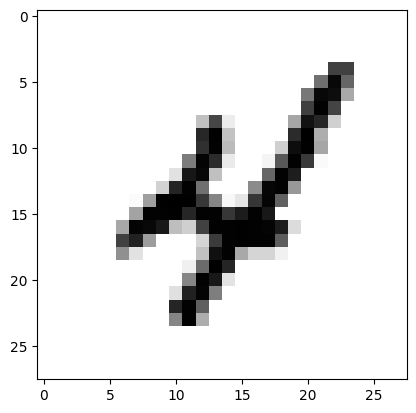

In [ ]:
for i in range(0,10):
  plt.imshow(x_train[i],cmap = 'binary')


# Data Preprocessing

In [ ]:

#preprocess image
# mormalizing Image to 0,1 range
x_train = x_train.astype(np.float32)/255
x_test = x_test.astype(np.float32)/255

print(x_train)

[[[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 ...

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]

 [[0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  ...
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]
  [0. 0. 0. ... 0. 0. 0.]]]


In [ ]:

#reshapring x trian , x test to make 1D (28*28*1)
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)


In [ ]:

#to convert classificated data to class from 0 to 9
from keras.utils import to_categorical

y_train =to_categorical(y_train)
y_test = to_categorical(y_test)


# Model Layers

In [ ]:

# model structure layers
model = Sequential()
# Layer 1
model.add(Conv2D(32,(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(2,2))
# Layer 2
model.add(Conv2D(64,(3,3) ,activation='relu'))
model.add(MaxPooling2D(2,2))
# Flaten to make one vector entered to Fully Connected Layer
model.add(Flatten())
# Drop some data
model.add(Dropout(0.25))
# Dense Layer
# Getting 10 Classes from data
model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Layers' Visualization

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 10)                  │          16,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

# Early Stopping and Learning Rate Reduction

In [ ]:

from keras.callbacks import ReduceLROnPlateau , EarlyStopping
# early stopping if accuracy disreases
es = EarlyStopping(monitor="val_loss", min_delta = 0.01, verbose=1, patience=4)
# learning_rate Update according to accuracy
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=3,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.00001)

# Compilation Process

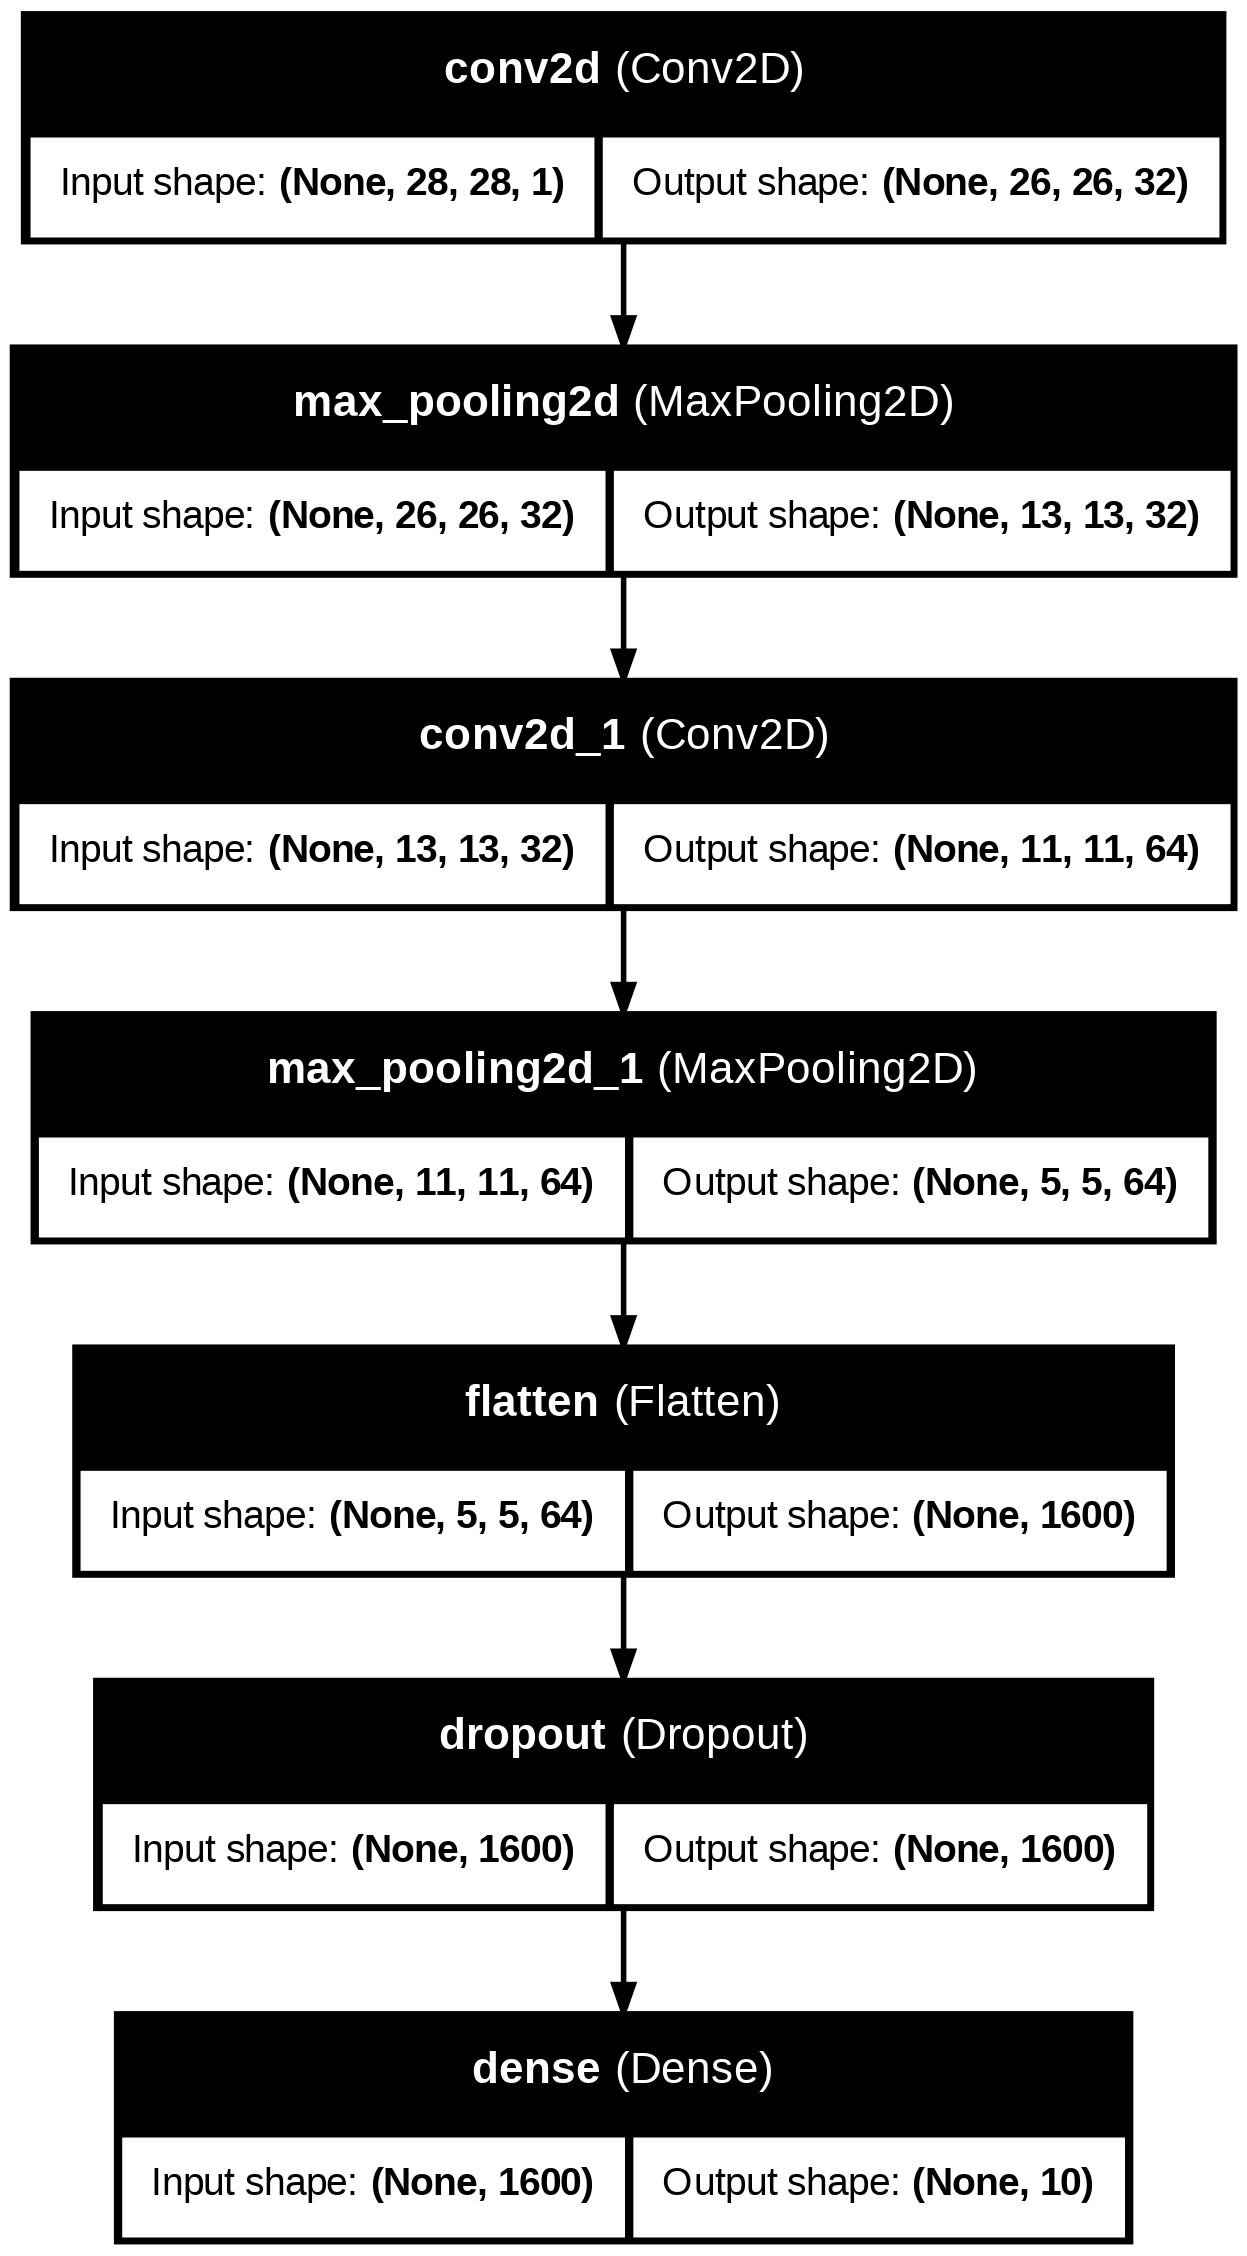

In [ ]:


# compile  mode and update the learning rate by step(0.001) and measure accuricy of model during compilation
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# to show the layers
tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


# Training Model

In [ ]:
# training model
history = model.fit(x_train, y_train,validation_split=0.3,
epochs=50,
callbacks = [learning_rate_reduction,es])


Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 50s 37ms/step - accuracy: 0.8526 - loss: 0.4716 - val_accuracy: 0.9786 - val_loss: 0.0718 - learning_rate: 0.0010
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accuracy: 0.9758 - loss: 0.0750 - val_accuracy: 0.9793 - val_loss: 0.0644 - learning_rate: 0.0010
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 77s 37ms/step - accuracy: 0.9838 - loss: 0.0532 - val_accuracy: 0.9834 - val_loss: 0.0503 - learning_rate: 0.0010
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9868 - loss: 0.0408 - val_accuracy: 0.9842 - val_loss: 0.0497 - learning_rate: 0.0010
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 82s 37ms/step - accuracy: 0.9891 - loss: 0.0343 - val_accuracy: 0.9874 - val_loss: 0.0399 - learning_rate: 0.0010
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 47s 36ms/step - accuracy: 0.9897 - loss: 0.0313 - val_accuracy: 0.9866 - val_loss: 0.0452 - learning_rate: 0.0010
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 87s 40ms/step - accura

NameError: name 'history' is not defined

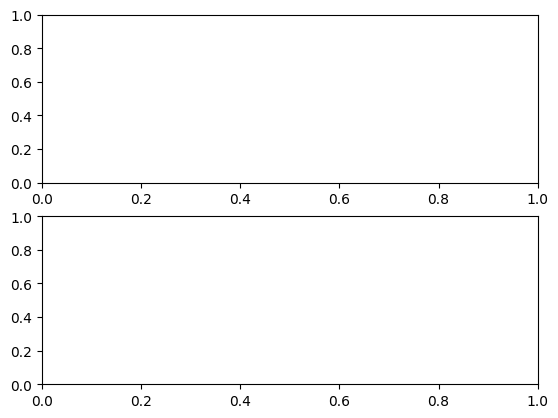

In [ ]:

# Plot the loss and accuracy curves for training and validation
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='orange', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['accuracy'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_accuracy'], color='orange',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

